# K-means clustering - Tutorial

Draft of a tutorial on K-means clustering. Text to be completed. A dataset more interesting that the Old Faithful dataset from R should be found.

K-means is an unsupervised method. The main idea is to separate the data points into K clusters. We then have to problems to solve. First, we need to find the k centroids of the k clusters. Then, we need to affect each data point to the cluster which centroid is the closest to the data point.

The algorithm is the following:

* Choose the number k of clusters
* Initialize the centers of the clusters
* Until convergence:
  - Affect each data point to its corresponding cluster
  - Update the centers of the clusters

Import useful Python packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from math import sqrt

Set seed for reproducibility

In [2]:
random.seed(0)

Import data

Text(0.5, 1.0, 'Old Faithful dataset')

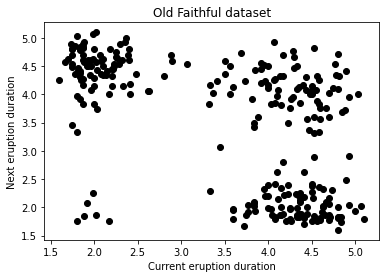

In [3]:
faithful = pd.read_csv('faithful.csv')
plt.plot(faithful['current'], faithful['next'], 'ko')
plt.xlabel('Current eruption duration')
plt.ylabel('Next eruption duration')
plt.title('Old Faithful dataset')

In [4]:
data = faithful.to_numpy()

Let us define a function to initialize the centroid of the clusters. We choose random points within the range of values taken by the data.

In [5]:
def init_centers(data, k):
    """
    """
    centers = np.zeros((k, np.shape(data)[1]))
    for i in range(0, k):
        dist = np.random.uniform(size=np.shape(data)[1])
        centers[i, :] = np.min(data, axis=0) + (np.max(data, axis=0) - np.min(data, axis=0)) * dist
    return centers

To be able to affect each data point to the closest centroid, we need to define the distance between two data points. The most common distance is the Euclidean distance:

$d(x,y) = \sqrt{\sum_{i = 1}^p (x_i - y_i)^2}$

where $x$ and $y$ are two data observation points with $p$ variables.

We then define a function to compute the distance between each data point and each centroid.

In [6]:
def compute_distance(data, centers, k):
    """
    """
    distance = np.zeros((np.shape(data)[0], k))
    for i in range(0, np.shape(data)[0]):
        for j in range(0, k):
            distance[i, j] = sqrt(np.sum(np.square(data[i, :] - centers[j, :])))
    return distance

We now define a function to affect each data point to the cluster which centroid is the closest to the point. We also define an objective function that will be minimized until we reach convergence.

Our objective is to minimize the sum of the distance between each point and the closest centroid:

$obj = \frac{1}{N} \sum_{j = 1}^k \sum_{i = 1}^{N_j} d(x^{(i)} , x^{(j)})$

where $x^{(i)}$ is the $i^{th}$ point in the cluster $j$, $x^{(j)}$ is the centroid of the cluster $j$, and $N_j$ is the number of points in the cluster $j$.

In [7]:
def compute_clusters(distance):
    """
    """
    clusters = np.zeros(np.shape(distance)[0])
    objective = 0.0
    for i in range(0, np.shape(distance)[0]):
        best = np.argmin(distance[i, :])
        clusters[i] = best
        objective = objective + distance[i, best]
    objective = objective / np.shape(distance)[0]
    return (clusters, objective)

After all points are affected to a cluster, compute the new location of the centroid. It is just the value of the mean of all the points affected to that cluster:

For $1 \leq j \leq p$, $x_p^{(j)} = \frac{1}{N_j} \sum_{i = 1}^{N_j} x_p^{(i)}$

In [8]:
def compute_centers(data, clusters, k):
    """
    """
    centers = np.zeros((k, np.shape(data)[1]))
    for i in range(0, k):
        subdata = data[clusters == i, :]
        if (np.shape(subdata)[0] == 0):
            centers[i, :] = init_centers(data, 1)
        else:
            centers[i, :] = np.mean(subdata, axis=0)
    return centers

We can now code the K-means algorithm by assembling all these functions. We stop the computation when the objective function no longer decreases.

In [9]:
def kmeans(data, k):
    """
    """
    centers = init_centers(data, k)
    objective_old = sqrt(np.sum(np.sqrt(np.max(data, axis=0) - np.min(data, axis=0))))
    clusters_old = np.zeros(np.shape(data)[0])
    stop_alg = False
    while stop_alg == False:
        distance = compute_distance(data, centers, k)
        (clusters_new, objective_new) = compute_clusters(distance)
        if objective_new >= objective_old:
            return (clusters_old, objective_old, centers)
        else:
            centers = compute_centers(data, clusters_new, k)
            objective_old = objective_new
            clusters_old = clusters_new

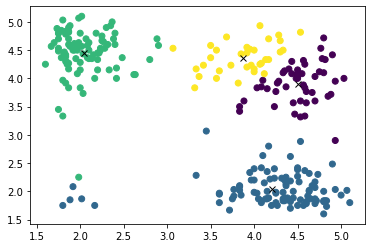

In [17]:
k = 4
(clusters, objective, centers) = kmeans(data, k)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.plot(centers[:, 0], centers[:, 1], 'kx')

The end result is very dependent on the choice of the initial centroids. Run next cells several times to see the varaitions of the clusters.

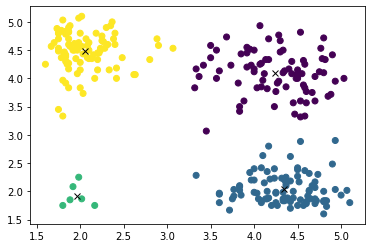

In [13]:
(clusters, objective, centers) = kmeans(data, k)
plt.scatter(data[:,0], data[:,1], c=clusters)
plt.plot(centers[:, 0], centers[:, 1], 'kx')

Result is very sensitive to the location of the initial centroid. Repeat the clustering N times and choose the clustering with the best objective function

In [ ]:
def repeat_kmeans(data, k, N):
    """
    """
    objective = np.zeros(N)
    clusters = np.zeros((N, np.shape(data)[0]))
    centers = np.zeros((N, k, np.shape(data)[1]))
    for i in range(0, N):
        result = kmeans(data, k)
        clusters[i, :] = result[0]
        objective[i] = result[1]
        centers[i, :, :] = result[2]
    best = np.argmin(objective)
    return (objective[best], clusters[best, :], centers[best, :, :])

Another solution: K-means++

## Choice of number of clusters

Elbow method

In [ ]:
def compute_elbow(data, clusters, centers, k):
    """
    """
    E = 0
    for i in range(0, k):
        distance = compute_distance(data[clusters == i, :], centers[i, :].reshape(1, -1), 1)
        E = E + np.mean(np.square(distance))
    return E

Compute the value of E for different values of the number of clusters

In [ ]:
E = np.zeros(8)
for k in range(1, 9):
    (objective, clusters, centers) = repeat_kmeans(data, k, N)
    E[k - 1] = compute_elbow(data, clusters, centers, k)

Plot. E reaches a minimum for 4 clusters.

In [ ]:
plt.plot(np.arange(1, 9), E)